In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def relu(z):
    return np.maximum(0,z)

In [3]:
def relu_prime(z):
    z[z < 0] = 0
    z[z > 0] = 1
    
    return z

In [4]:
def cost_function(yHat, y):
    return ((yHat-y)**2 / 2.0).sum()

In [5]:
def cost_prime(yHat, y):
    return yHat - y

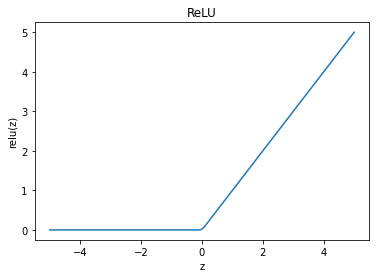

In [6]:
x = np.linspace(-5,5,100)
y = relu(x)
plt.plot(x,y)
plt.xlabel("z"), plt.ylabel("relu(z)"), plt.title("ReLU")
plt.show()

In [7]:
data = np.array([[0.  , 0.  , 0.  , 0.  , 1.],
       [1.  , 1.  , 1.  , 1.  , 0.],
       [0.03, 0.7 , 0.5 , 1.  , 0.],
       [0.16, 0.09, 0.2 , 0.  , 1.],
       [0.5 , 0.5 , 1.  , 0.  , 1.],
       [0.07, 0.34, 0.  , 0.  , 1.],
       [1.  , 0.5 , 0.5 , 1.  , 0.]])

In [8]:
x = data[:,0:3]
y = data[:,3:6]
print("data(r,g,b)=\n{}\nlabels(black, white)=\n{}".format(x, y))

data(r,g,b)=
[[0.   0.   0.  ]
 [1.   1.   1.  ]
 [0.03 0.7  0.5 ]
 [0.16 0.09 0.2 ]
 [0.5  0.5  1.  ]
 [0.07 0.34 0.  ]
 [1.   0.5  0.5 ]]
labels(black, white)=
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [84]:
INPUT_LAYER_SIZE = 3
HIDDEN_LAYER_SIZE = 3
OUTPUT_LAYER_SIZE = 2
lr = 0.1
iters = 10000

In [10]:
def init_weights():
    """
    initializ matrix with mean = 0 and variance = 1 and Xavier Initialization 
    """

    Wh = np.random.randn(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE) * \
    np.sqrt(2.0/INPUT_LAYER_SIZE)
    Wo = np.random.randn(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE) * \
    np.sqrt(2.0/HIDDEN_LAYER_SIZE)
    
    return Wh, Wo

In [11]:
def init_bias():
    '''
    initialize vectors of biases to all 0.1
    '''
    Bh = np.full((1, HIDDEN_LAYER_SIZE), 0.1)
    Bo = np.full((1, OUTPUT_LAYER_SIZE), 0.1)
    
    return Bh, Bo

In [12]:
def feed_forward(x, Wh, Wo):

    #returns non-relu'd layers but returns relu output layer
      
    #hidden layer
    Zh = np.dot(x, Wh) + Bh 
    H = relu(Zh)
    
    #output layer
    Zo = np.dot(H, Wo) + Bo 
    yHat = relu(Zo)
    
    return Zh, Zo, yHat

In [13]:
def backprop(x, y, Wh, Wo, lr):
    """
    x: 100x3
    y: 100x2
    Wh: 3x3
    Wo: 3x2
    Zh: 100x3 => x*Wh
    H: 100x3
    Zo: 100x2 => H*Wo
    
    dWh: 3x3
    dWo: 3x2
    
    100
    
    
    Eo = 100x2
    Wo = 3x2
    Zh = 100x3
    """
    sets = len(y)
    
    Zh, Zo, yHat = feed_forward(x, Wh, Wo)
    H = relu_prime(Zh)

    #100x2 =>    100x2       *    100x2
    Eo = cost_prime(yHat, y) * relu_prime(Zo)
    
    #100x3 =>  100x3      100x2 2x3 => 100x3
    Eh = relu_prime(Zh) * np.dot(Eo, Wo.T)  
    
    #3x2 =>     3x100 100x2 
    dWo = np.dot(H.T, Eo)
    #3x3 =>     3x100 100x3  
    dWh = np.dot(x.T, Eh)
    
    #divide by total to get average and then multiply by learning rate
    dWo /= sets
    dWh /= sets
    dWo *= lr
    dWh *= lr
    
    Wo -= dWo
    Wh -= dWh
    
    return Wo, Wh

In [78]:
def train(x, y, Wh, Wo, lr, iters):
    cost_history = []
    cost = 0
    
    for i in range(iters):
        Zh, Zo, yHat = feed_forward(x, Wh, Wo)
        backprop(x, y, Wh, Wo, lr)
        if i % 500 == 0:
            cost=cost_function(yHat, y)
            cost_history.append(cost)
            
            print("iter={} cost={:.4f}".format(i, cost))
    
    return cost_history, Wh, Wo

In [91]:
Wh, Wo = init_weights()
Bh, Bo = init_bias()

In [99]:
cost_history, Wh, Wo = train(x, y, Wh, Wo, lr, iters)

iter=0 cost=0.0000
iter=500 cost=0.0000
iter=1000 cost=0.0000
iter=1500 cost=0.0000
iter=2000 cost=0.0000
iter=2500 cost=0.0000
iter=3000 cost=0.0000
iter=3500 cost=0.0000
iter=4000 cost=0.0000
iter=4500 cost=0.0000
iter=5000 cost=0.0000
iter=5500 cost=0.0000
iter=6000 cost=0.0000
iter=6500 cost=0.0000
iter=7000 cost=0.0000
iter=7500 cost=0.0000
iter=8000 cost=0.0000
iter=8500 cost=0.0000
iter=9000 cost=0.0000
iter=9500 cost=0.0000


In [98]:
perfect_weights = [array([[ 0.18965856,  0.2409345 , -0.06274811],
        [ 0.91988459, -1.24119426,  0.95379204],
        [-0.91938837,  0.53156228, -1.53155747]]),
 array([[ 3.10312233, -0.39656037],
        [-2.61947787,  6.84737144],
        [-3.38618702,  2.5462908 ]])]
perfect_weights

[array([[ 0.18965856,  0.2409345 , -0.06274811],
        [ 0.91988459, -1.24119426,  0.95379204],
        [-0.91938837,  0.53156228, -1.53155747]]),
 array([[ 3.10312233, -0.39656037],
        [-2.61947787,  6.84737144],
        [-3.38618702,  2.5462908 ]])]

In [19]:
def normalize(rgb):
    return rgb/255

In [94]:
rgb = np.array([[64, 0, 128]])

In [95]:
def guess(rgb, Wh, Wo):
    Zh, Zo, out = feed_forward(rgb, Wh, Wo)
    return out

In [96]:
guess(normalize(rgb), Wh, Wo)

array([[0.        , 3.02583563]])

In [27]:
Wh, Wo

(array([[ 0.01108372,  0.09480501,  0.16035944],
        [ 0.08966162, -1.26002979,  0.76467559],
        [-0.33652048,  0.87058249, -0.19193856]]),
 array([[-3.08655835,  7.69884086],
        [-1.46345603,  2.69806082],
        [ 1.29707084, -0.30801278]]))

In [28]:
Bh, Bo

(array([[0.1, 0.1, 0.1]]), array([[0.1, 0.1]]))